In [16]:
import pandas as pd

1) загрузите данные из прилагаемого архива (там есть описание данных, данные для обучения и данные для тестирования). 

In [17]:
train_data = pd.read_csv('./data/CompleteResponses.csv')
train_data

,salary,age,elevel,car,zipcode,credit,brand
0,119806.54480,45,0,14,4,442037.71130,0
1,106880.47840,63,1,11,6,45007.17883,1
2,78020.75094,23,0,15,2,48795.32279,0
3,63689.93635,51,3,6,5,40888.87736,1
4,50873.61880,20,3,14,4,352951.49770,0
...,...,...,...,...,...,...,...
9893,87580.91422,75,1,18,8,282511.90950,1
9894,129181.38200,75,2,7,4,384871.36390,1
9895,97828.08884,66,2,15,0,399446.69620,1
9896,20000.00000,24,1,14,1,223204.64950,1


2) Уберите в данных целевой признак. 

In [18]:
y = train_data['brand']
train_data = train_data.drop(columns='brand')
train_data

,salary,age,elevel,car,zipcode,credit
0,119806.54480,45,0,14,4,442037.71130
1,106880.47840,63,1,11,6,45007.17883
2,78020.75094,23,0,15,2,48795.32279
3,63689.93635,51,3,6,5,40888.87736
4,50873.61880,20,3,14,4,352951.49770
...,...,...,...,...,...,...
9893,87580.91422,75,1,18,8,282511.90950
9894,129181.38200,75,2,7,4,384871.36390
9895,97828.08884,66,2,15,0,399446.69620
9896,20000.00000,24,1,14,1,223204.64950


3) Выполните нормализацию признаков.

In [19]:
from sklearn.preprocessing import Normalizer

In [20]:
norm = Normalizer()
train_data_norm = norm.fit_transform(train_data)
cols = ['salary', 'age', 'elevel', 'car', 'zipcode', 'credit']
data = pd.DataFrame(train_data_norm, columns=cols)
data

,salary,age,elevel,car,zipcode,credit
0,0.261594,0.000098,0.000000,0.000031,0.000009,0.965178
1,0.921620,0.000543,0.000009,0.000095,0.000052,0.388093
2,0.847840,0.000250,0.000000,0.000163,0.000022,0.530252
3,0.841507,0.000674,0.000040,0.000079,0.000066,0.540246
4,0.142663,0.000056,0.000008,0.000039,0.000011,0.989771
...,...,...,...,...,...,...
9893,0.296106,0.000254,0.000003,0.000061,0.000027,0.955155
9894,0.318202,0.000185,0.000005,0.000017,0.000010,0.948023
9895,0.237879,0.000160,0.000005,0.000036,0.000000,0.971295
9896,0.089246,0.000107,0.000004,0.000062,0.000004,0.996010


In [21]:
train_data_norm

array([[2.61594481e-01, 9.82563319e-05, 0.00000000e+00, 3.05686366e-05,
        8.73389617e-06, 9.65177868e-01],
       [9.21620208e-01, 5.43243013e-04, 8.62290496e-06, 9.48519546e-05,
        5.17374298e-05, 3.88092626e-01],
       [8.47840215e-01, 2.49937673e-04, 0.00000000e+00, 1.63002830e-04,
        2.17337107e-05, 5.30251715e-01],
       ...,
       [2.37878838e-01, 1.60485639e-04, 4.86320118e-06, 3.64740088e-05,
        0.00000000e+00, 9.71294822e-01],
       [8.92463110e-02, 1.07095573e-04, 4.46231555e-06, 6.24724177e-05,
        4.46231555e-06, 9.96009579e-01],
       [3.95364562e-01, 1.39400313e-04, 4.10000922e-06, 8.20001844e-06,
        2.87000645e-05, 9.18524274e-01]])

4) Постройте дендограмму методом дальнего соседа - оцените предполагаемое количество кластеров. Совпадает ли это количество с заранее известным? 

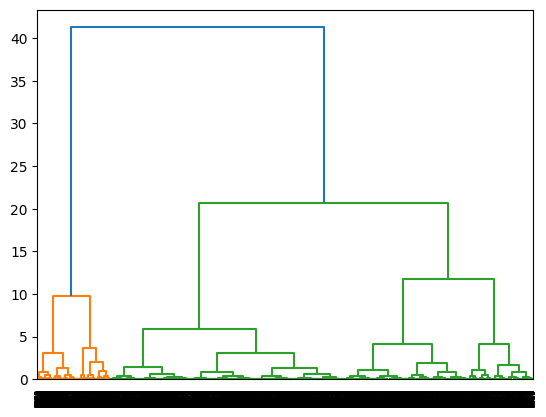

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(train_data_norm,'ward', 'euclidean')
dn = dendrogram(link)

Количество совпадает.

5) Используя метод главных компонент (PCA), осуществите понижение размерности данных. Визуализируйте данные в проекции на первые две главные компоненты. Сколько кластеров можно предположить по полученному рисунку?

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)


X_pca = pca.fit_transform(data)

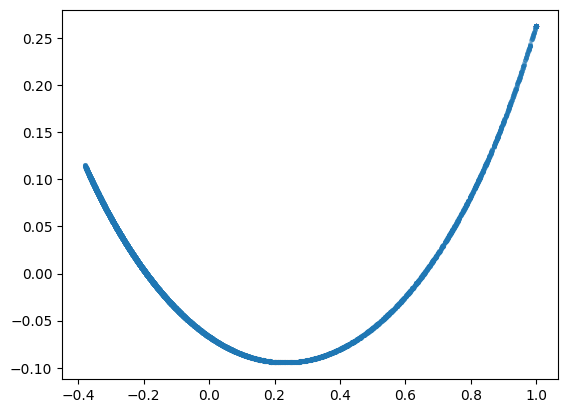

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.4, s=7)

6) Выполните понижение размерности методом t-SNE, отобразите результат. Что можно теперь сказать о количестве кластеров?

/home/asskicker54/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/asskicker54/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


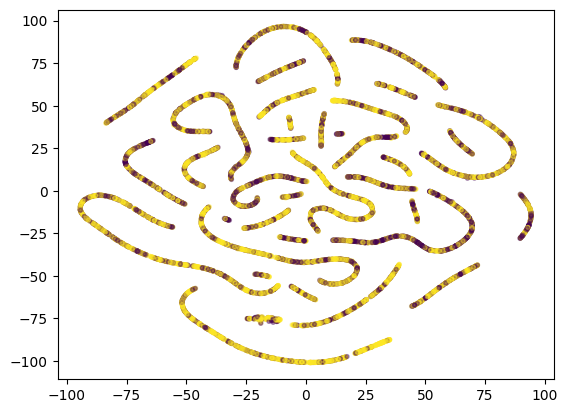

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(data)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.4, s=8)

7) Используя метод "локтя" и метод К-средних определите оптимальное количество кластеров. Ответ обоснуйте.

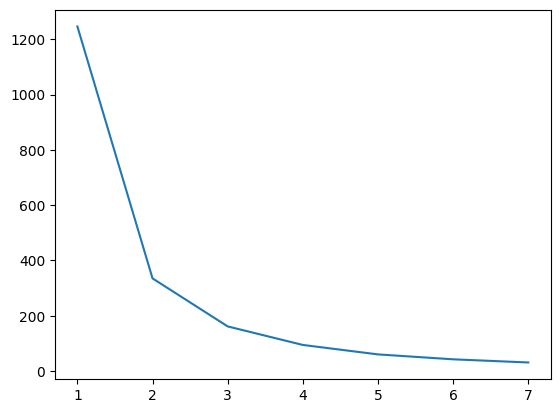

In [27]:
from sklearn.cluster import KMeans

criterion = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(train_data_norm)
    criterion.append(kmeans.inertia_)
plt.plot(range(1, 8), criterion)

Метод локтя указывает на два кластера

8) На основе предыдущих пунктов создайте модель на основе метода К-средних с оптимальным количеством кластеров. Обучите на предоставленных данных.

In [29]:
from sklearn.metrics import classification_report

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pd.get_dummies(data, columns=['elevel', 'car', 'zipcode']))

print(classification_report(y, kmeans.labels_))


              precision    recall  f1-score   support

           0       0.38      0.80      0.51      3744
           1       0.63      0.21      0.31      6154

    accuracy                           0.43      9898
   macro avg       0.50      0.50      0.41      9898
weighted avg       0.53      0.43      0.39      9898



9) Получите процентное соотношение верных ответов на тестовых данных.

Точность получилась 50%-51%